# Imports

In [21]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Dataset Import

In [4]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

In [6]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
dataset.shape

(30, 2)

In [5]:
#Looking for correlation between salary and years of experience
#What is the best fitting line for this relationship
#Salary = b0 + b1*Experience
#b0 is the constant, where the line crosses the y axis, when Experience is 0
#b1 is the slope of the line

# Pre Processing

In [9]:
# Breaking out independent (X) and dependent (y) variables
X = dataset.iloc[:, :-1].values #all rows and columns except last column, Years Experience
y = dataset.iloc[:, 1].values #all rows for the last column, Salary

# Missing Values

In [4]:
# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

# Encoding Categorical Data

In [5]:
# # Encoding categorical data, assigning numbers to the categories
# # Encoding the Independent Variable
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

# Split into Train/Test

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
#the array that train_test_split is looking for above is an array, meaning it needs your 
#indepent and dependent variable fed to it in that order

# Feature Scaling

In [11]:
# from sklearn.preprocessing import StandardScaler

In [12]:
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train) #only have to fit the sc_X object once
# X_test = sc_X.transform(X_test) #dont need to fit the test set

In [15]:
# X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])

In [16]:
# Do not need to apply feature scaling to the dependent y variable here because they are 0 and 1. May need to in the future

# Fitting Simple Linear Regression to the Training Set

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()
#Now fit to training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results

In [18]:
#Vector of predicted values, vector of predictions for the dependent variable
y_pred = regressor.predict(X_test)

In [19]:
y_pred #predicted salaries for X_test using the linear regression model

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [20]:
y_test #the real salaries for X_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

# Visualizing the Training set results

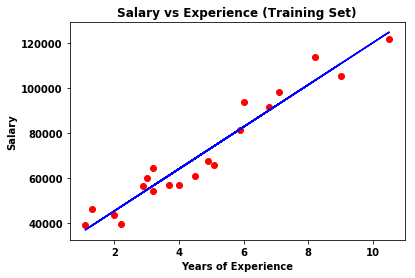

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #observations of training set data predicted
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
#Red points are the real points, blue line represents predicted salaries based on train data

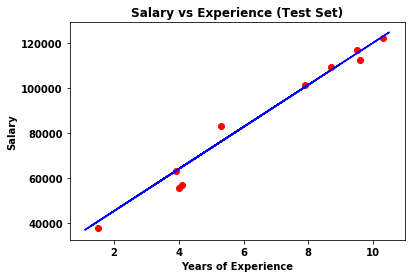

In [25]:
#Predicting new observations and visualizing it, visualize the test set results compared to trained model
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #observations of train set, now comparing to the test data
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
#Red points are the real points from the test set, blue line represents predicted salaries based on train data